## Задание

Дана фотография одинокого яблока крупно на очень светлом или очень темном фоне в формате JPEG.

Имя файла с фотографией вводится с клавиатуры. Какое это яблоко - зеленое, желтое, белое (очень светложелтое или светло-зеленое) или красное?

Ответ вывести названием цвета (одно слово) на русском языке в нижнем регистре.

In [ ]:
from PIL import Image
import numpy as np
import math
from sklearn.cluster import KMeans

Наборы цветов

In [ ]:
colorSet = {'зеленое': (95,134,55), 'желтое': (225,190,44),
            'красное': (176,68,73), 'белое': (205,205,185),
            'белый фон': (255,255,255), 'темный фон': (40,40,40)}

In [ ]:
!gdown --folder 1VCi8k2IClU__VSRG0N_Err4fYtZc6bQb

Retrieving folder contents
Processing file 1DBi9B63RpezlrLnCMryGbXyyi_I_HR-N 1.jpg
Processing file 1pxnhPpzu1F9eJYUdQwsKiObegXq2uxem 2.jpg
Processing file 1YyKaPMDFhfBM9_5QlxwSiOYAxpx4Dlr5 3.jpg
Processing file 1XkOkmPWXQLMnKvAwwH6OWE1LKYKgh6X5 4.jpg
Processing file 169cpvQxulOIhWGmrZuSuCXhBU_b41keI 5.jpg
Processing file 1B987v1DrfnY7EwWpU7Ll3zTkOs7lOutS 6.jpg
Processing file 1lN_kHyMcLoTJPKYtZkrHG4l4Pivd_fqF 7.jpg
Processing file 1f7ibLnyuywR7h5-uGM_47ZsY5iquEDOJ 8.jpg
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1DBi9B63RpezlrLnCMryGbXyyi_I_HR-N
To: /content/Лабораторная 2/1.jpg
100% 88.5k/88.5k [00:00<00:00, 4.62MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pxnhPpzu1F9eJYUdQwsKiObegXq2uxem
To: /content/Лабораторная 2/2.jpg
100% 889k/889k [00:00<00:00, 9.49MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YyKaPMDFhfBM9_5QlxwSiOYAxpx4Dlr5
To: /content/Л

Загрузите изображение и выведите его на экран

/content/Лабораторная 2/7.jpg


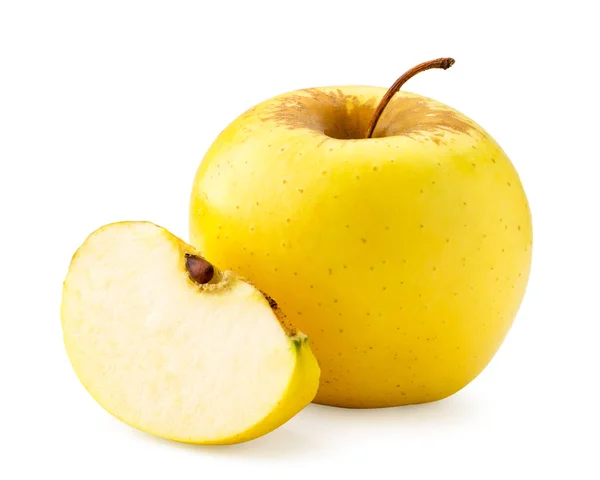

In [ ]:
image = Image.open(input(''))
image

In [ ]:
def distanse(a,b):
  r = (a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2
  return math.sqrt(r)

In [ ]:
pixel_array = []
for i in range(image.size[0]):
  for j in range(image.size[1]):
    pixel = image.getpixel((i, j))
    pixel_array.append(pixel)

In [ ]:
color_array = np.array(pixel_array)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(color_array)
dominant_colors = kmeans.cluster_centers_.astype(int)

In [ ]:
detected_color = None
min_dist = float('inf')

In [ ]:
for dom_color in dominant_colors:
    for color_name, color_value in colorSet.items():
        dist = distanse(dom_color, color_value)
        if dist < min_dist:
            min_dist = dist
            detected_color = color_name

print(f'Цвет яблока: {detected_color}')

Цвет яблока: белый фон
